<a href="https://colab.research.google.com/github/TamTran72111/learn-ml-dl/blob/master/Augelien_Geron_book/04_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

\begin{equation*}
\hat{y} = \theta^T  x
\end{equation*}

**The Normal Equation**

\begin{equation*}
\hat{\theta} = (X^TX)^{-1}X^Ty
\end{equation*}


In [0]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

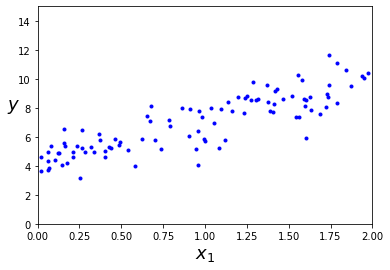

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [0]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [54]:
theta_best

array([[4.26096238],
       [2.86634411]])

In [55]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.26096238],
       [9.9936506 ]])

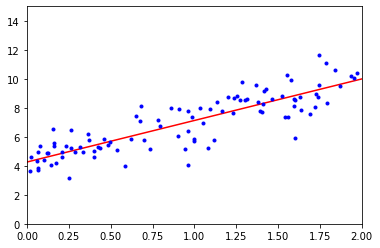

In [56]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.26096238]), array([[2.86634411]]))

In [58]:
lin_reg.predict(X_new)

array([[4.26096238],
       [9.9936506 ]])

In [59]:
theta_best_svd , residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.26096238],
       [2.86634411]])

In [60]:
np.linalg.pinv(X_b).dot(y)

array([[4.26096238],
       [2.86634411]])

## Gradient Descent

**Batch Gradient Descent**

\begin{equation*}
\nabla_\theta MSE(\theta) = \begin{pmatrix}
\frac{\partial}{\partial\theta_0}MSE(\theta) \\
\frac{\partial}{\partial\theta_1}MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial\theta_n}MSE(\theta) \end{pmatrix} = \frac{2}{m}X^T(X\theta - y)
\end{equation*}

In [0]:

eta = 0.1       # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)   # random initialization

for iteration in range(n_iterations):
  gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients


In [62]:
theta

array([[4.26096238],
       [2.86634411]])

In [0]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X, y, 'b.')
  n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = 'b-' if iteration > 0 else 'r--'
      plt.plot(X_new, y_predict, style)
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel('$x_1$', fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r'$\eta = {}$'.format(eta), fontsize=16)

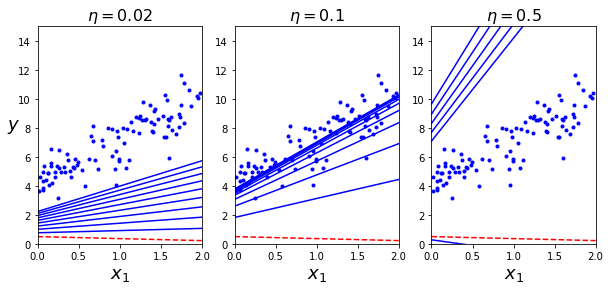

In [64]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()

**Stochastic Gradient Descent**

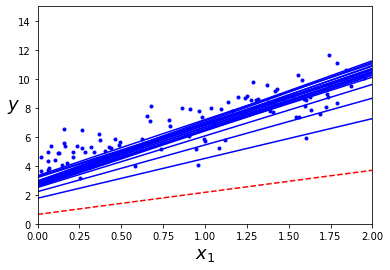

In [65]:
n_epochs = 50
t0, t1 = 5, 50        # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:
      y_predict = X_new_b.dot(theta)
      style = 'b-' if i > 0 else 'r--'
      plt.plot(X_new, y_predict, style)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [66]:
theta

array([[4.25858506],
       [2.88541388]])

In [67]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [68]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.26496177]), array([2.89292181]))

**Mini-batch Gradient Descent**

## Polynomial Regression

In [0]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

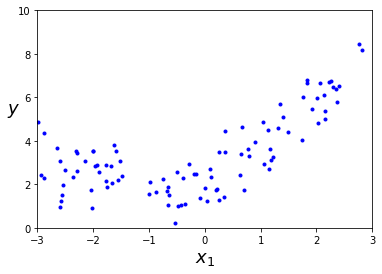

In [70]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [71]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.15290063]), array([2.15290063, 4.63498111]))

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.28405711]), array([[0.88171323, 0.44446033]]))

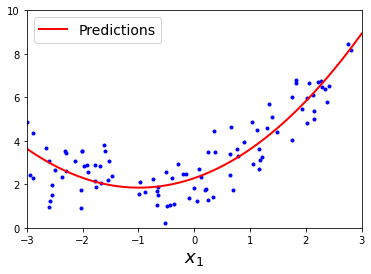

In [73]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Learning Curves

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
  plt.legend(loc='upper right', fontsize=14)
  plt.xlabel('Training set size', fontsize=14)
  plt.ylabel('RMSE', fontsize=14)

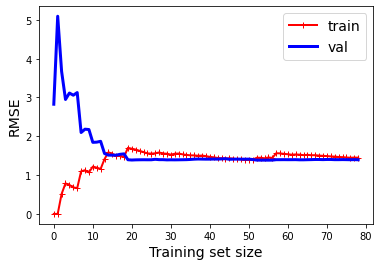

In [75]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

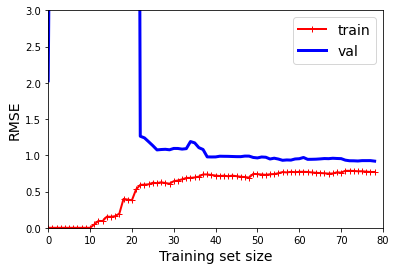

In [76]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
  ('lin_reg', LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

## Regularized Linear Models

**Ridge Regression**

\begin{equation*}
J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum^n_{i=1}\theta_i^2
\end{equation*}

The hyperparameter $\alpha$ controls how much to regularize the model

In [77]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky') # using closed-form solution
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.66784461]])

In [78]:
lin_reg.predict([[1.5]])

array([[4.67888575]])

In [79]:
sgd_reg = SGDRegressor(penalty='l2')  # l2 means regularizing using the l2 norm
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.65328865])

**Lasso Regression**

*Least Absolute Shrinkage and Selection Operator Regression*

\begin{equation*}
J(\theta) = MSE(\theta) + \alpha\sum^n_{i=1}\mid\theta_i\mid
\end{equation*}

In [80]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.61400886])

**Elastic Net**

The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio **$r$**

\begin{equation*}
J(\theta) = MSE(\theta) + r\alpha\sum^n_{i=1}\mid\theta_i\mid + \frac{1-r}{2}\alpha\sum^n_{i=1}\theta^2_i
\end{equation*}

In [81]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.62211027])

**Early Stopping**

In [0]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [0]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
  ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
  ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True, when the fit() method is called it continues training where 
# it left off, instead of restarting from scratch
sdg_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=5e-4)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

## Logistic Regression

*Logistic function*

\begin{equation*}
\sigma(t) = \frac1{1 + e^{-t}}
\end{equation*}

In [84]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))
X = iris['data'][:, 3:]     # petal width
y = (iris['target'] == 2).astype(np.int)  # 1 if Iris virginica, else 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

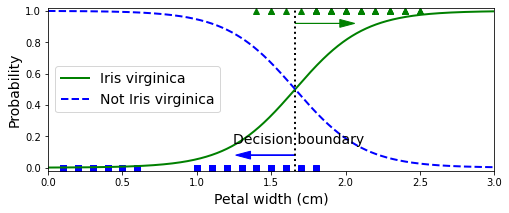

In [86]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], 'bs')
plt.plot(X[y==1], y[y==1], 'g^')
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth=2)
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label='Not Iris virginica')
plt.text(decision_boundary+0.02, 0.15, 'Decision boundary', fontsize=14,
         color='k', ha='center')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1,
          fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1,
          fc='g', ec='g')
plt.xlabel('Petal width (cm)', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.legend(loc='center left', fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

**Softmax Regression**

*Softmax function* (also called the normalized exponential)

Softmax score for class $k$:
\begin{equation*}
s_k(\mathbf{x}) = \mathbf{x}^T\theta^{(k)}
\end{equation*}

Softmax function:
\begin{equation*}
\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{e^{s_k(\mathbf{x})}}{\sum^K_{j=1}e^{s_j(\mathbf{x})}}
\end{equation*}

 - $K$ is the number of classes
 - $\mathbf{s}(\mathbf{x})$ is a vector containing the scores of each class for the instance $\mathbf{x}$

*Cross entropy cost function*

\begin{equation*}
J(\Theta) = -\frac{1}{m}\sum^m_{i=1}\sum^K_{k=1}y_k^{(i)}log(\hat{p}_k^{(i)})
\end{equation*}

*Cross entropy gradient descent vector for calss $k$*

\begin{equation*}
\nabla_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum^m_{i=1}(\hat{p}_k^{(i)} - y_k^{(i)})\mathbf{x}^{(i)}
\end{equation*}

In [89]:
X = iris['data'][:, (2, 3)]     # petal length and petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
softmax_reg.predict([[5, 2]])

array([2])

In [91]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Exercise

In [0]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [0]:
np.random.seed(2042) # make the solution reproducible

In [0]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

random_indices = np.random.permutation(total_size)

X_train = X_with_bias[random_indices[:train_size]]
y_train = y[random_indices[:train_size]]
X_val = X_with_bias[random_indices[train_size:-test_size]]
y_val = y[random_indices[train_size:-test_size]]
X_test = X_with_bias[random_indices[-test_size:]]
y_test = y[random_indices[-test_size:]]

In [0]:
def to_one_hot(y):
  n_classes = y.max() + 1
  m = len(y)
  Y_one_hot = np.zeros((m, n_classes))
  Y_one_hot[np.arange(m), y] = 1
  return Y_one_hot

In [105]:
y_train[:10]

array([1, 0, 0, 1, 0, 2, 1, 0, 0, 0])

In [106]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [0]:
Y_train_one_hot = to_one_hot(y_train)
Y_test_one_hot = to_one_hot(y_test)
Y_val_one_hot = to_one_hot(y_val)

In [0]:
def softmax(logits):
  exps = np.exp(logits)
  exp_sums = np.sum(exps, axis=1, keepdims=True)
  return exps / exp_sums

In [109]:
X_train.shape

(90, 3)

In [0]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [111]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
  logits = X_train.dot(Theta)
  Y_proba = softmax(logits)
  loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
  error = Y_proba - Y_train_one_hot
  if iteration % 500 == 0:
    print(iteration, loss)
  gradients = 1 / m * X_train.T.dot(error)
  Theta = Theta - eta * gradients

0 2.0098317606794267
500 0.7775485994012685
1000 0.6358595299644286
1500 0.553854152323856
2000 0.5002301566083223
2500 0.46167353758270924
3000 0.43206307086901297
3500 0.4082683127711592
4000 0.3885249426733036
4500 0.3717545031055311
5000 0.35725297209557083


In [117]:
Theta

array([[ 3.30012252, -0.19360882, -3.26721327],
       [-1.20747709, -0.58488635, -0.4152438 ],
       [-2.1970059 ,  0.25677352,  1.72547638]])

In [118]:
logits = X_val.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


0.0

**Regularization**

In [119]:

eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 2.968736899582155
500 0.5197864820932234
1000 0.4910558310637946
1500 0.48254537680629156
2000 0.4793184131301125
2500 0.4779874890546233
3000 0.4774151434812393
3500 0.4771630781432382
4000 0.47705044259988794
4500 0.47699964640820014
5000 0.47697660148778764


In [121]:
logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.9333333333333333

**Early Stopping**

In [123]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_val.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_val_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 1.2228887773488555
500 0.6088578815548521
1000 0.5835421933313618
1500 0.574561785424977
2000 0.5707334898076005
2500 0.568945165749855
3000 0.5680506094388436
3500 0.5675762824554909
4000 0.5673115435729696
4500 0.5671570557717311
5000 0.5670634761835922


In [126]:
logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.9333333333333333